Objectives: Cluster global ciries based on cost of living to identify natural lifestyle groups
Expected output : Lifestyle clusters, cluster map on world map and interpretations

# Data import

In [9]:
import pandas as pd
df_raw = pd.read_csv('../datasets/raw/Cost_of_living_index.csv')
df_raw.head()

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,"Hamilton, Bermuda",137.56,103.03,121.21,126.56,151.77,114.19
1,2,"Zurich, Switzerland",128.65,62.62,97.39,127.35,127.14,142.39
2,3,"Basel, Switzerland",126.89,46.14,88.66,120.44,129.10,141.48
3,4,"Lausanne, Switzerland",119.62,50.35,86.83,116.35,122.83,132.58
4,5,"Bern, Switzerland",118.42,39.22,80.93,114.54,114.86,115.48


# EDA

In [10]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            536 non-null    int64  
 1   City                            536 non-null    object 
 2   Cost of Living Index            536 non-null    float64
 3   Rent Index                      536 non-null    float64
 4   Cost of Living Plus Rent Index  536 non-null    float64
 5   Groceries Index                 536 non-null    float64
 6   Restaurant Price Index          536 non-null    float64
 7   Local Purchasing Power Index    536 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 33.6+ KB


In [11]:
df_raw.isna().sum()

Rank                              0
City                              0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

In [12]:
df_raw.duplicated().sum()

np.int64(0)

In [13]:
features = ['Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index',
            'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']
df_raw[features].describe().T

,count,mean,std,min,25%,50%,75%,max
Cost of Living Index,536.0,57.187575,19.984921,19.26,39.3700,61.970,70.8650,137.56
Rent Index,536.0,25.209851,16.453828,3.43,11.6875,23.095,33.4400,106.49
Cost of Living Plus Rent Index,536.0,42.050485,17.457656,12.36,26.6475,44.450,53.0950,121.21
Groceries Index,536.0,49.758209,19.320901,18.01,31.4975,51.570,62.7575,127.35
Restaurant Price Index,536.0,54.684851,25.092353,11.93,31.5500,59.405,72.3425,151.77
Local Purchasing Power Index,536.0,89.492668,37.038404,2.24,56.7925,94.105,119.5000,186.00


### Analyzing Key Drivers of the Cost of Living Index
To identify which index drives the cost of living index most strongly we use correlation analysis. But since, correlation doesnt imply causation we also check using linear regression

#### Correlation analysis

In [14]:
df_raw[features].corr()

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
Cost of Living Index,1.000000,0.813330,0.965727,0.956609,0.948267,0.679833
Rent Index,0.813330,1.000000,0.936467,0.805118,0.778726,0.617931
Cost of Living Plus Rent Index,0.965727,0.936467,1.000000,0.935911,0.919096,0.685538
Groceries Index,0.956609,0.805118,0.935911,1.000000,0.857695,0.658621
Restaurant Price Index,0.948267,0.778726,0.919096,0.857695,1.000000,0.697221
Local Purchasing Power Index,0.679833,0.617931,0.685538,0.658621,0.697221,1.000000


#### Correlation heatmap

<Axes: >

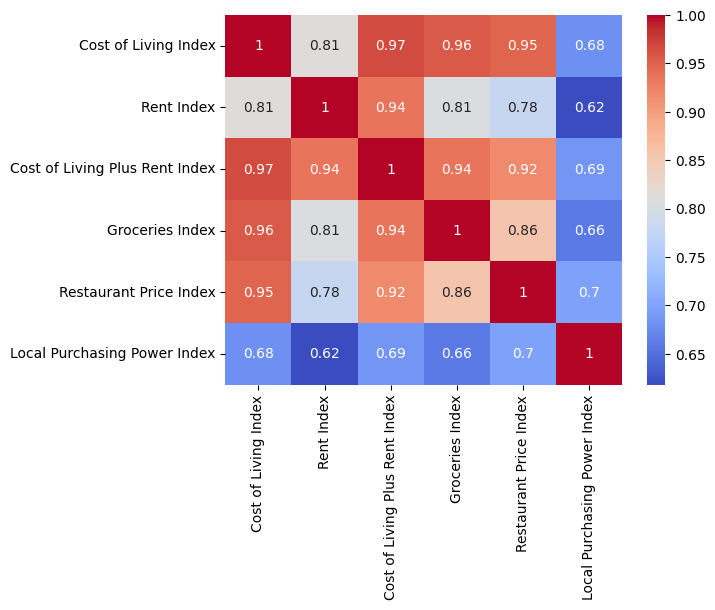

In [15]:
import seaborn as sns
corr = df_raw[features].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

#### Linear regression

In [16]:
from sklearn.linear_model import LinearRegression
X = df_raw[['Rent Index', 'Groceries Index', 
            'Restaurant Price Index', 'Local Purchasing Power Index']]
Y = df_raw['Cost of Living Index']
model = LinearRegression()
reg = model.fit(X, Y)
r_square = model.score(X,Y)
print(reg.coef_)


[ 0.00669198  0.56451904  0.39502368 -0.01555458]


In [17]:
df_reg_results = pd.DataFrame({
    'features' : X.columns,
    'coefficient' : reg.coef_,
    'R^2 square' : r_square,
})
df_reg_results

,features,coefficient,R^2 square
0,Rent Index,0.006692,0.977283
1,Groceries Index,0.564519,0.977283
2,Restaurant Price Index,0.395024,0.977283
3,Local Purchasing Power Index,-0.015555,0.977283


#### Interpretations:
Highest correlation and regression coefficient for Groceries index and 97.77293 % R square means that the Groceries index has most strong impact on the cost of living.

Surprising observation here is that, the rent index has very negligible impact on cost of living even though the correlation was high thus indicating that as the cost of living index grows the rent index also grows alongside but independently rent index doesnot cause those changes much.

And finally the purchasing power should have some reverse impact but a weak one.

### Pair plots between features

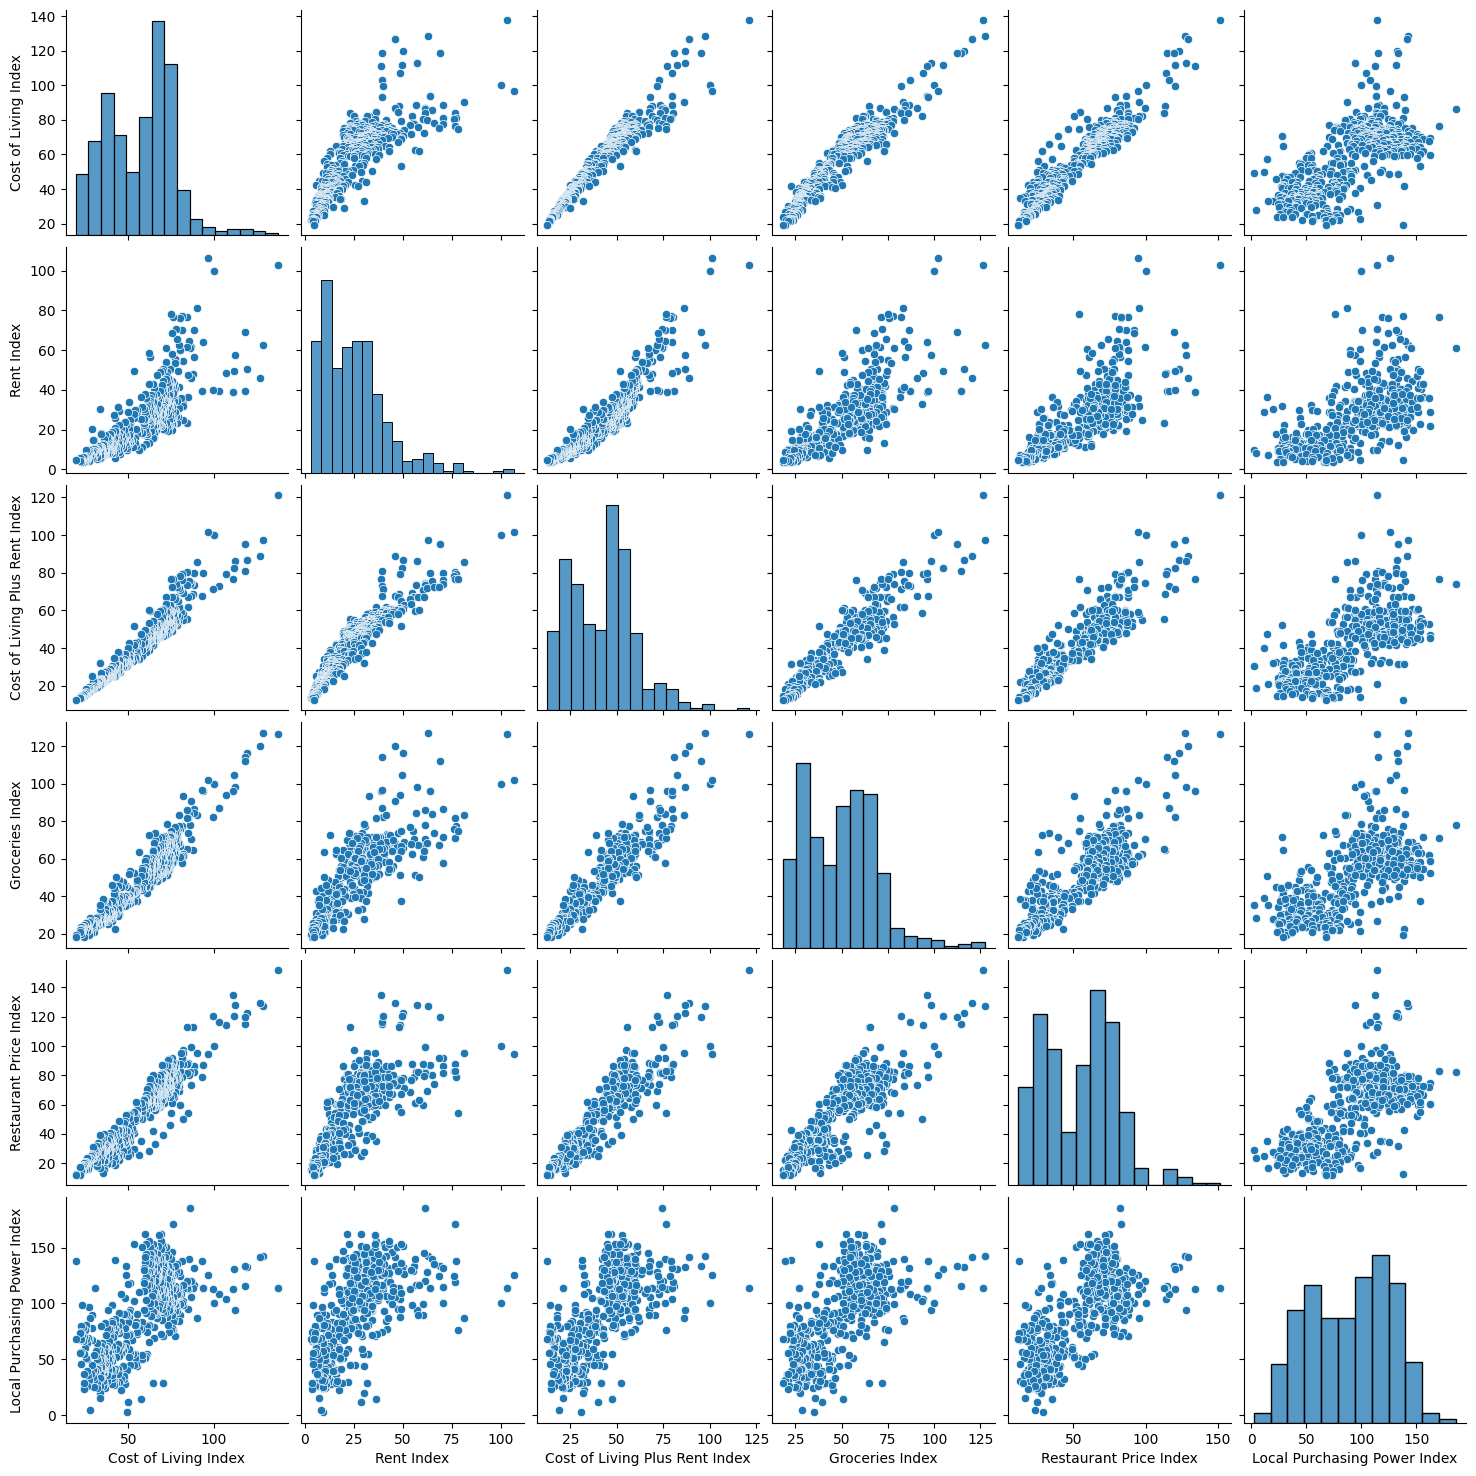

In [18]:
import seaborn as sns
sns.pairplot(df_raw[features])

#### Interpretation from pair plot:
1. A close and strong relationship between groceries index and cost of living index
2. Most countries have cost of index of about 70-80, some countries below 80, but very few have higher cost indexes above 80(i.e outliers). Similar conclusions can be made for other indexes based on above chart.

# Notable cities 

#### Mumbai
Very high local purchasing power but low cost of living 

<Axes: xlabel='Cost of Living Index', ylabel='Local Purchasing Power Index'>

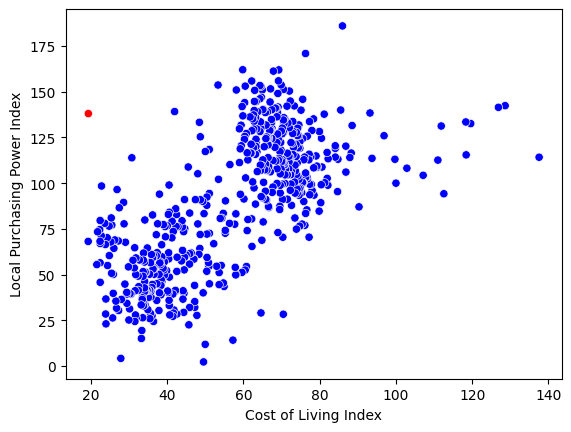

In [19]:
import numpy as np
color = np.where(df_raw['City'] == 'Navi Mumbai, India','red','blue')
sns.scatterplot(x='Cost of Living Index', y='Local Purchasing Power Index', data=df_raw , c=color)

In [20]:
df_raw[(df_raw['Cost of Living Index']<30) & (df_raw['Local Purchasing Power Index']>100)]

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
534,535,"Navi Mumbai, India",19.3,4.7,12.39,19.21,12.55,138.06


#### Hamilton,Bermuda
Most expensive city with highest Cost of living

<Axes: xlabel='Cost of Living Index', ylabel='Local Purchasing Power Index'>

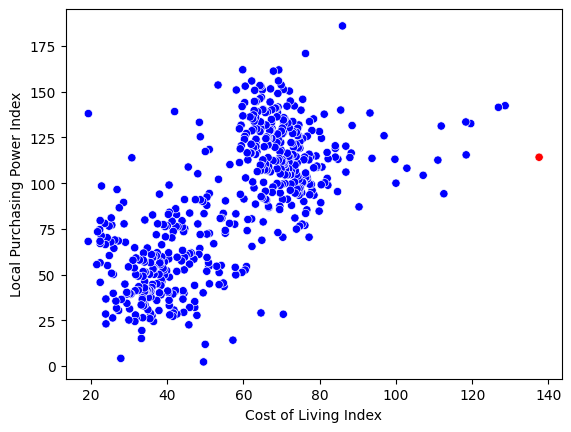

In [21]:
import numpy as np
color = np.where(df_raw['City'] == 'Hamilton, Bermuda','red','blue')
sns.scatterplot(x='Cost of Living Index', y='Local Purchasing Power Index', data=df_raw , c=color)

#### Reykjavik,Iceland
Comparitively expensive but less income

<Axes: xlabel='Cost of Living Index', ylabel='Local Purchasing Power Index'>

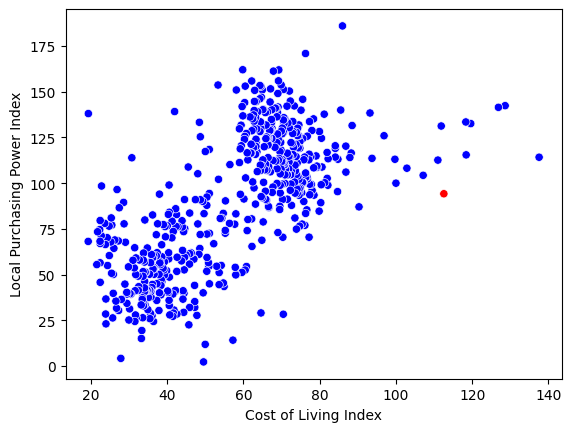

In [22]:
import numpy as np
color = np.where(df_raw['City'] == 'Reykjavik, Iceland','red','blue')
sns.scatterplot(x='Cost of Living Index', y='Local Purchasing Power Index', data=df_raw , c=color)

#### Kathmandu,Nepal
Low income and low cost of living (Developing economy)

In [23]:
df_raw[df_raw['City'] == 'Kathmandu, Nepal']

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
476,477,"Kathmandu, Nepal",31.89,5.15,19.23,27.07,20.72,26.48


<Axes: xlabel='Cost of Living Index', ylabel='Local Purchasing Power Index'>

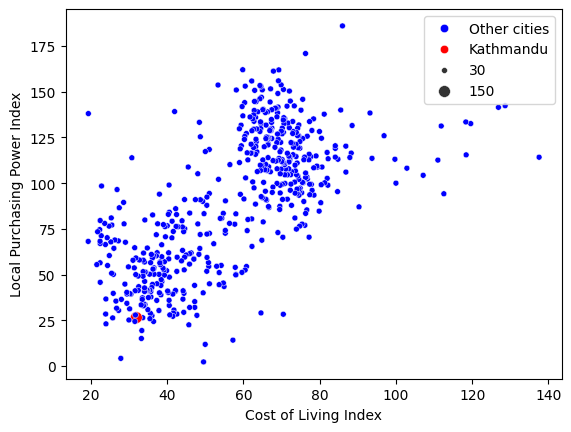

In [24]:
import numpy as np
color = np.where(df_raw['City'] == 'Kathmandu,Nepal','red','blue')
sizes = np.where(df_raw['City'] == 'Kathmandu,Nepal', 3, 1)
sns.scatterplot(x='Cost of Living Index', y='Local Purchasing Power Index', data=df_raw ,   
                hue=np.where(df_raw['City'] == 'Kathmandu, Nepal', 'Kathmandu', 'Other cities'),size=np.where(df_raw['City'] == 'Kathmandu, Nepal', 150, 30),
                palette={'Kathmandu': 'red', 'Other cities': 'blue'})

#### Interpretations:
1. Mumbai,India is the city with high local purchasing index i.e high income but least cost of living making it the most affordable places
2. Reykjavik,Iceland is the city with very high living cost index i.e >100 but comparity low cost of living index.
3. Kathmandu,Nepal lies on the lower segment of both cost of living index and local purchasing power index.

Since the features are highly correlated and our objective is to visualize clustering we need to apply PCA. PCA stands for Principal Component Analysis which is used to reduce the dimension(no. of features) while preserving the underlying datastructure and relationships (information). But to check if we can get clear visualization without PCA, we will come back to it later

# World map visualization

In [25]:
import plotly.express as px
df = df_raw[['City','Cost of Living Index']]
fig = px.choropleth(df,color='Cost of Living Index',hover_name='City',locations='City',locationmode="country names")
fig.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_11780\1528972613.py:3: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.choropleth(df,color='Cost of Living Index',hover_name='City',locations='City',locationmode="country names")


# Preprocessing

### Normalization of features

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = ['Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index', 'Groceries Index', 
            'Restaurant Price Index', 'Local Purchasing Power Index']
X = df_raw[features]
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 4.02541028,  4.73402565,  4.53860812,  3.97877589,  3.87272732,
         0.66742624],
       [ 3.57915766,  2.27576801,  3.17288923,  4.01970245,  2.89023644,
         1.42950936],
       [ 3.49100899,  1.27324175,  2.67235497,  3.66172458,  2.96842085,
         1.40491731],
       ...,
       [-1.78639155, -1.27444025, -1.64554135, -1.48517863, -1.49965887,
        -0.9194362 ],
       [-1.89757907, -1.24767378, -1.70058291, -1.58257347, -1.68075951,
         1.31249447],
       [-1.89958245, -1.2482821 , -1.70230296, -1.63800565, -1.70549131,
        -0.57676904]], shape=(536, 6))

### Inertia Plot
Plotting inertia for number of clusters in the range of 2 to 15 to find the optimal number of clusters

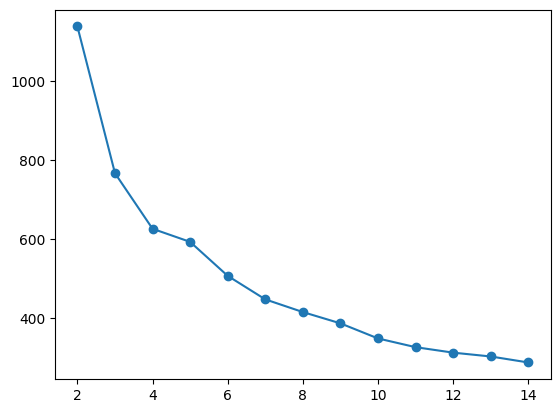

In [28]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
inertia = []
for k in range(2,15):
    km = KMeans(n_clusters=k,random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
plt.plot(range(2,15),inertia,marker='o') 


#### Interpretations 
From above elbow method,we get inertia which in simple terms is how close the datapoints are from the centroid of clusters. Here,we can see it starts decreasing slowly and linearly after K value of 3 or 4 thus it might be a good number of clusters. To confirm we also use Silhoutte score

### Silhoutte scores

In [29]:
from sklearn.metrics import silhouette_score
for k in range(2,15):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    print(k, silhouette_score(X_scaled, labels))

2 0.5707570970483348
3 0.5421713918270352
4 0.42137949958112364
5 0.38586976151702207
6 0.3507040891893135
7 0.28188942589556737
8 0.2760343831880245
9 0.27944876873768953
10 0.27209918375889314
11 0.280350704409106
12 0.26281007206066126
13 0.24708804943963067
14 0.2338976692966371


#### Interpretations
Silhouette scores measures how well a point is matched to its cluster 1 being the best and -1 being the worst positioning. Thus from analyzing the silhouette_score, 3 clusters might be optimal 

# K means clustering

In [30]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_raw['Cluster'] = kmeans.fit_predict(X_scaled)
cluster_summary = df_raw.groupby('Cluster')[features].mean()
print(cluster_summary)


         Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  \
Cluster                                                                     
0                   68.590593   31.021700                       50.806838   
1                   38.485378   12.107773                       25.999286   
2                   91.991111   61.829778                       77.713333   

         Groceries Index  Restaurant Price Index  Local Purchasing Power Index  
Cluster                                                                         
0              59.707866               69.937905                    115.157628  
1              32.556429               31.024664                     56.540420  
2              84.797333               94.064889                    119.479333  


### Problem encountered
We have acheived 3 clusters based on affordability but here is a small problem. The column "Purchasing power index" holds inverse correlation with cost of living where every other column holds a positive correlation. This means that higher cost of living means less affordability but higher purchasing power index means more affordability which might confuse the Kmean model. So the solution is to invert the Purchasing power index so that all the columns are consistent with each other

In [31]:
df_raw['Inverse Purchasing Power Index'] = -df_raw['Local Purchasing Power Index']
df_raw.head()

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Cluster,Inverse Purchasing Power Index
0,1,"Hamilton, Bermuda",137.56,103.03,121.21,126.56,151.77,114.19,2,-114.19
1,2,"Zurich, Switzerland",128.65,62.62,97.39,127.35,127.14,142.39,2,-142.39
2,3,"Basel, Switzerland",126.89,46.14,88.66,120.44,129.10,141.48,2,-141.48
3,4,"Lausanne, Switzerland",119.62,50.35,86.83,116.35,122.83,132.58,2,-132.58
4,5,"Bern, Switzerland",118.42,39.22,80.93,114.54,114.86,115.48,2,-115.48


Using inversed purchasing power to create clusters

In [32]:
features2 = ['Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index', 'Groceries Index', 
            'Restaurant Price Index', 'Inverse Purchasing Power Index']

In [33]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_raw['Cluster'] = kmeans.fit_predict(X_scaled)
cluster_summary = df_raw.groupby('Cluster')[features2].mean()
print(cluster_summary)


         Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  \
Cluster                                                                     
0                   68.590593   31.021700                       50.806838   
1                   38.485378   12.107773                       25.999286   
2                   91.991111   61.829778                       77.713333   

         Groceries Index  Restaurant Price Index  \
Cluster                                            
0              59.707866               69.937905   
1              32.556429               31.024664   
2              84.797333               94.064889   

         Inverse Purchasing Power Index  
Cluster                                  
0                           -115.157628  
1                            -56.540420  
2                           -119.479333  


# Cluster plots

### Scatter plot

<Axes: xlabel='Cost of Living Index', ylabel='Groceries Index'>

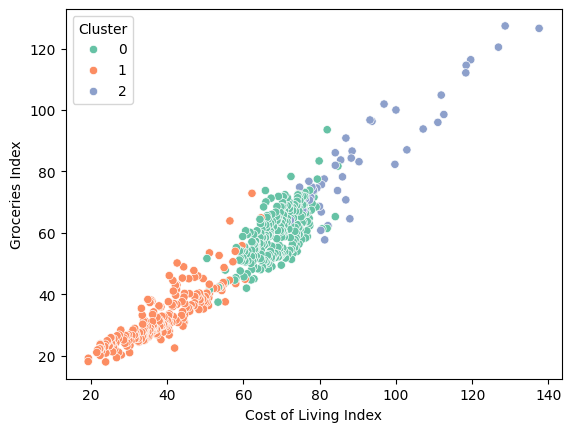

In [34]:
sns.scatterplot(x='Cost of Living Index', y='Groceries Index', hue='Cluster', data=df_raw, palette='Set2')


<Axes: xlabel='Cost of Living Index', ylabel='Local Purchasing Power Index'>

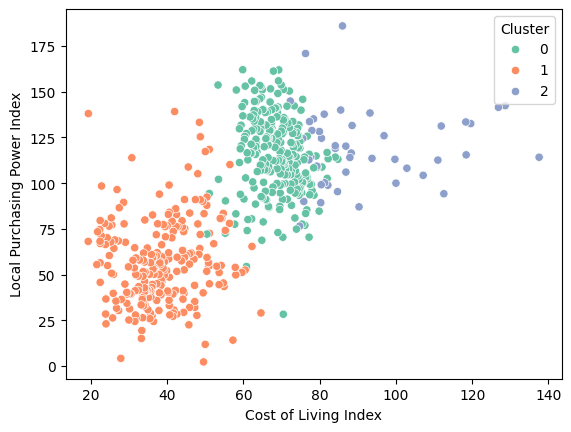

In [35]:
sns.scatterplot(x='Cost of Living Index', y='Local Purchasing Power Index', hue='Cluster', data=df_raw, palette='Set2')


### World cluster map

In [44]:
import plotly.express as px
fig = px.choropleth(df_raw,color='Cluster',hover_name='City',locations='City',locationmode="country names")
fig.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_11780\4271443582.py:2: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



Note:
The above visualization might miss important cities and fails to represent some cities in cluster 2. Better visualization has been done using Power BI

In [37]:
df_raw.to_csv('final_result.csv')

# Conclusion
Note:As we can see the goal was to cluster cities based on affordability but we have got 2 clusters with almost similar Purchasing Power index. In this case if the 2 columns were highly correlated we would need to standarize or create another index combining both.But since they are less correlated based on above analysis even though they have similar purchasing power index, they give very important insights. 

### Interpretations from  K mean clustering
| Cluster | Cost of living | Rent       | Groceries | Restaurant price | Purchasing power | Meaning                                         |
|---------|----------------|------------|-----------|-----------------|-----------------|-------------------------------------------------|
| 0       | Moderate       | Moderate   | Moderate  | Moderate        | High            | Well developed, high income but cheap          |
| 1       | Low            | Low        | Low       | Low             | Low             | Developing economies                            |
| 2       | Very High      | Very High  | Very High | Very High       | High       | High cost, comparitively mid income                          |
